<a href="https://colab.research.google.com/github/rodirk/spezielle_bioinfo_2_22/blob/main/Spezielle_bioinformatik_II_image_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tag 1

### Import 

In [ ]:
!pip install ipympl

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import ipympl

In [2]:
from google.colab import output
output.enable_custom_widget_manager()

In [3]:
%matplotlib widget

### Image Basics

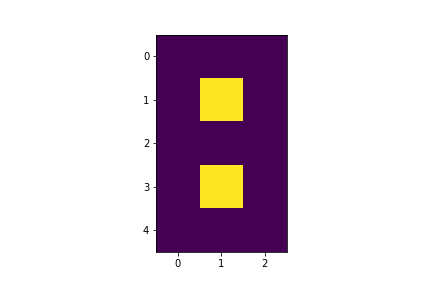

In [4]:
#load image

image = skimage.io.imread(fname="/content/drive/MyDrive/data/eight.tif")
plt.imshow(image)

In [ ]:
print(image.shape)
print(image)

(5, 3)
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


[[0. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


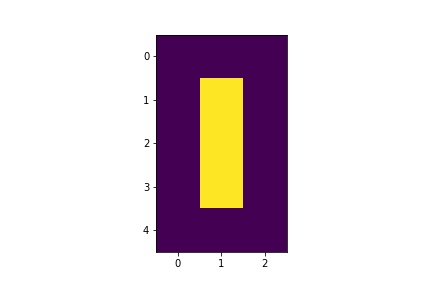

In [ ]:
#Manipulate Array

zero = skimage.io.imread(fname="/content/drive/MyDrive/data/eight.tif")
zero[2,1]=1.0

#plot in a new interactive figure
fig,ax =plt.subplots()
plt.imshow(zero)
print(zero)

[[0. 0. 0.]
 [0. 1. 1.]
 [0. 0. 0.]
 [1. 1. 0.]
 [0. 0. 0.]]


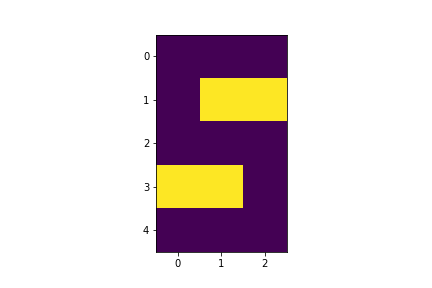

In [ ]:
#Aufgabe 1: Mache aus der 8 eine 5

five = skimage.io.imread(fname="/content/drive/MyDrive/data/eight.tif")
five[1,2] = 1.0
five[3,0] = 1.0

fig,ax =plt.subplots()
plt.imshow(five)
print(five)

### Colors

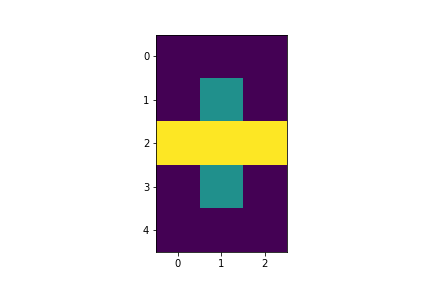

In [ ]:
drei_farben =skimage.io.imread(fname="/content/drive/MyDrive/data/eight.tif")

#Gesamtes Array it 128 multiplizieren
drei_farben = drei_farben * 128

#mittlere reihe auf 255 setzen

drei_farben[2,:] = 255


fig,ax =plt.subplots()
plt.imshow(drei_farben)

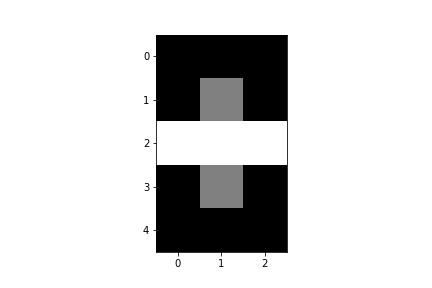

In [ ]:
#Bild in Graustufen anzeigen lassen

fig,ax =plt.subplots()
plt.imshow(drei_farben, cmap=plt.cm.gray)

[[[125 220 173]
  [112 177 241]
  [240 183  88]
  [ 18  24 144]]

 [[ 53  41  33]
  [ 27  11 147]
  [126  94 232]
  [203  48 147]]

 [[166  72 142]
  [ 93  16 250]
  [218 139 222]
  [ 97 130 208]]

 [[245  15 151]
  [229  81  87]
  [213 165 244]
  [184 242 122]]]


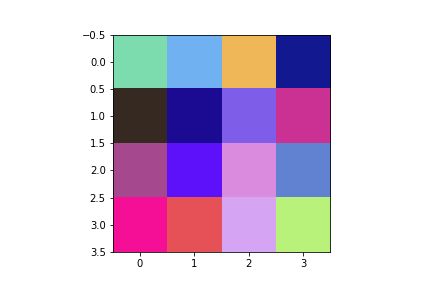

In [ ]:
#Seed setzen

pseudorandom = np.random.RandomState(2022)

#4x4 matrix mit drei dimensionen erstellen
checkerboard = pseudorandom.randint(0,255, size=(4,4,3))

#plotten
fig,ax =plt.subplots()
plt.imshow(checkerboard)

#zeig arrays
print(checkerboard)

In [ ]:
#infos rechts oben pixel
pixel_ro = checkerboard[1,3,:]
pixel_ro

array([203,  48, 147])

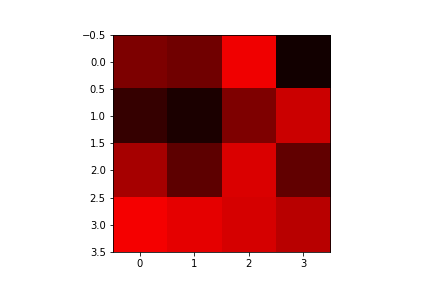

In [ ]:
#Channel einzeln ansehen'

red_channel = checkerboard * [1,0,0]

#plotten
fig,ax =plt.subplots()
plt.imshow(red_channel)

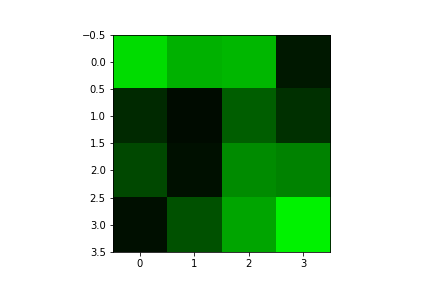

In [ ]:
green_channel = checkerboard * [0,1,0]

#plotten
fig,ax =plt.subplots()
plt.imshow(green_channel)

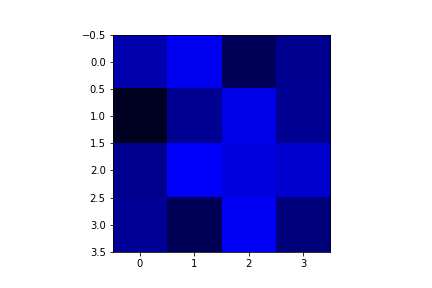

In [ ]:
blue_channel = checkerboard * [0,0,1]

#plotten
fig,ax =plt.subplots()
plt.imshow(blue_channel)

### Lesson 2: Working with skimage

Aufgabe: Schreibt eine Funktion, die das Plotten der Bilder vereinfacht.

In [5]:
def plot(img):
  fig,ax =plt.subplots()
  plt.imshow(img) 

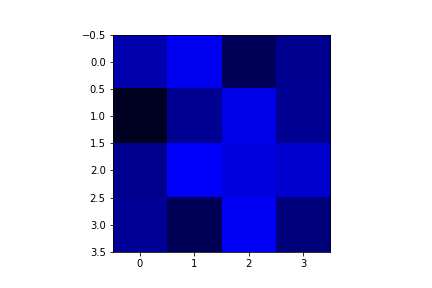

In [ ]:
plot(blue_channel)

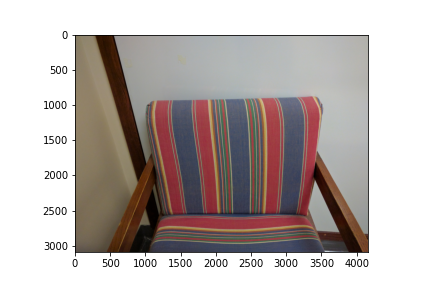

In [ ]:
#Laden des Stuhlbildes
image =skimage.io.imread("/content/drive/MyDrive/data/chair.jpg")

plot(image)

In [ ]:
#speichern als Tiff

skimage.io.imsave("/content/drive/MyDrive/data/chair.tif", arr=image2)

In [ ]:
import skimage.transform

In [ ]:
#Verkleinern des Bildes auf 10% der Größe

new_shape = (image.shape[0] // 10, image.shape[1] // 10, image.shape[2])

small = skimage.transform.resize(image=image, output_shape=new_shape)
small = skimage.img_as_ubyte(small)

new_shape

(308, 416, 3)

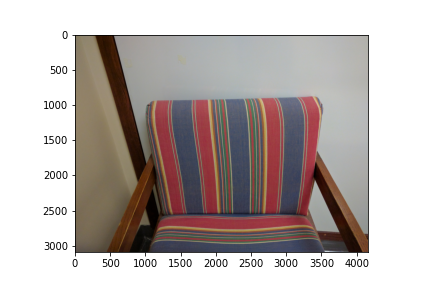

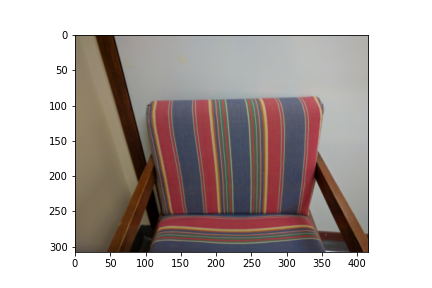

In [ ]:
# Lösung der Aufgabe "Bild laden, Größe auf 10%, Bild speichern als Tif, Bild + kleines Bild Plotten":

# Laden des Bildes

image =skimage.io.imread("/content/drive/MyDrive/data/chair.jpg")

# Bild auf 10% der Größe verkleinern 

new_shape = (image.shape[0] // 10, image.shape[1] // 10, image.shape[2])

small = skimage.transform.resize(image=image, output_shape=new_shape)
small = skimage.img_as_ubyte(small)

#Bild speichern als Tif

skimage.io.imsave("/content/drive/MyDrive/data/chair_small.tif", arr=small)

#Original + Small plotten

plot(image)
plot(small)



### Pixel manipulieren 

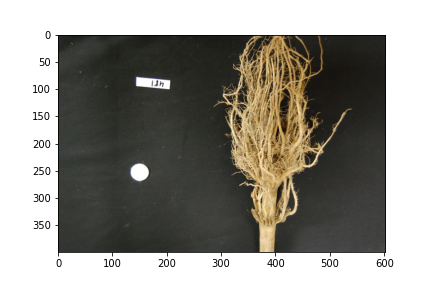

In [ ]:
#read image
root = skimage.io.imread("/content/drive/MyDrive/data/maize-root-cluster.jpg")

plot(root)

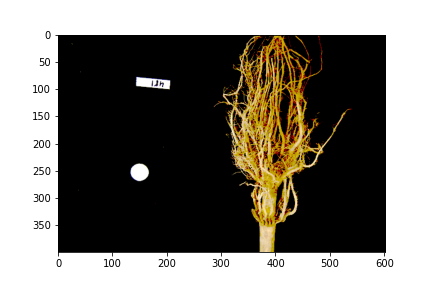

In [ ]:
#nur hohe intensitäten behalten
root[root <128] = 0

plot(root)

### Konvertierung zu Grayscale Bildern 

In [ ]:
import skimage.color

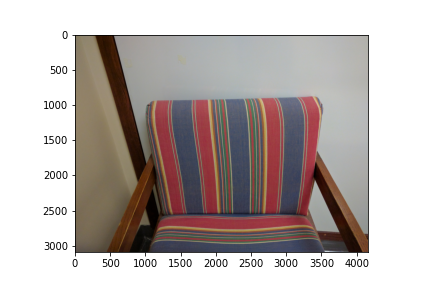

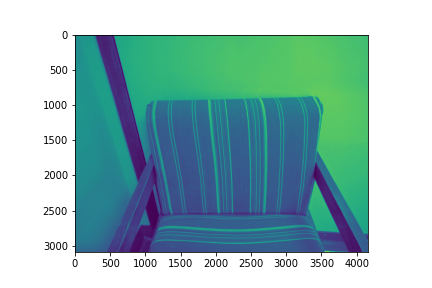

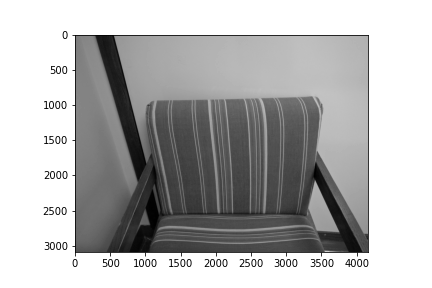

In [ ]:
#Bild laden
image =skimage.io.imread("/content/drive/MyDrive/data/chair.jpg")

plot(image)


#Konvertieren zu Grayscale

gray_image = skimage.color.rgb2gray(image)
plot(gray_image)


fig,ax = plt.subplots()
plt.imshow(gray_image, cmap="gray")

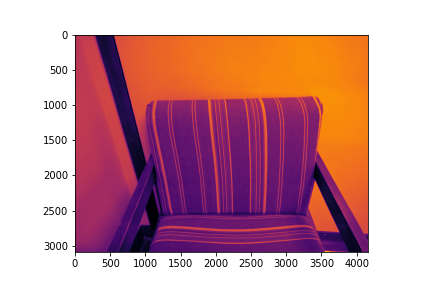

In [37]:
#Bild laden
image2 =skimage.io.imread(fname="/content/drive/MyDrive/data/chair.jpg", as_gray=True)

fig,ax = plt.subplots()
plt.imshow(image2, cmap="inferno")

### Bildausschnitte via Array-Slicing

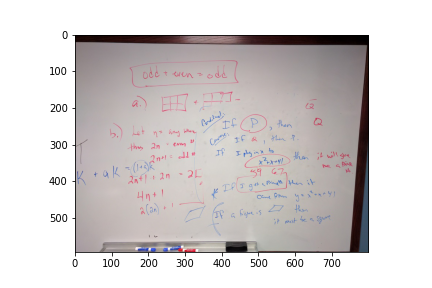

In [ ]:
# Bild laden 

board =skimage.io.imread(fname="/content/drive/MyDrive/data/board.jpg")

plot(board)

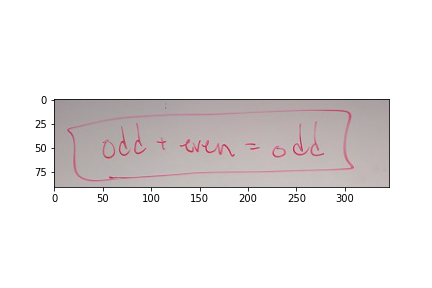

In [ ]:
#ausschnitt des Bildbereichs
clip = board[60:151, 135:481, :]
plot(clip)

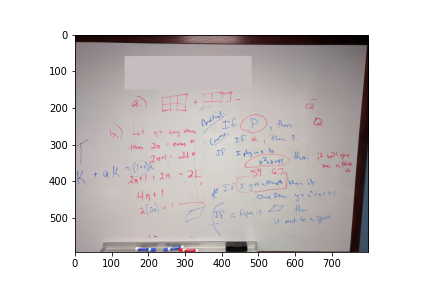

In [ ]:
#farbe ersetzten im originalbild

color = board[330, 90]
board[60:151, 135:481] = color

plot(board)

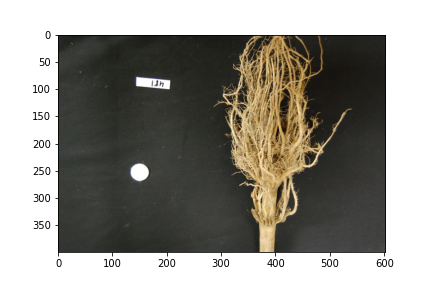

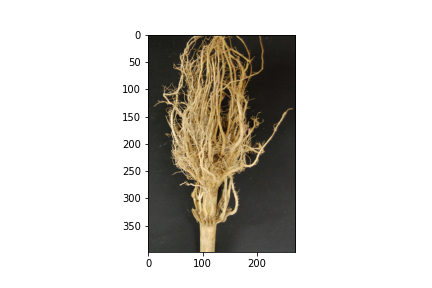

In [ ]:
### Aufgabe: Schneide die Wurzel aus und Plotte sie

#read image
root = skimage.io.imread("/content/drive/MyDrive/data/maize-root-cluster.jpg")

plot(root)


#ausschneiden und plotten:

clip = root[1:400, 275:545, :]
plot(clip)

## Tag 2: 

### Lesson 3: Drawing and Bitwise Operations

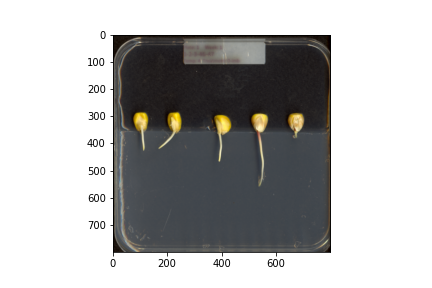

In [15]:
image = skimage.io.imread("/content/drive/MyDrive/data/maize-seedlings.tif")

plot(image)

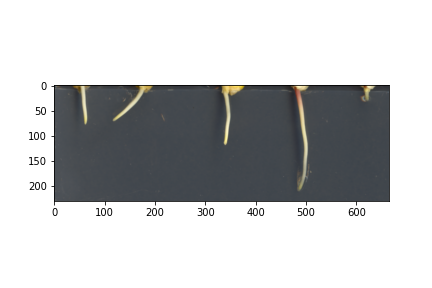

In [16]:
#Aufgabe: schneide mittels "slicing" den unteren Bereich des Bildes (mit den Wurzeln) aus

clip = image[350:580,50:715,:]
plot(clip)

In [17]:
import skimage.draw

In [19]:
mask = np.ones(shape=image.shape[0:2], dtype="bool")

In [20]:
rr,cc = skimage.draw.rectangle(start=(360,72), end= (600,755))

mask[rr,cc] = False

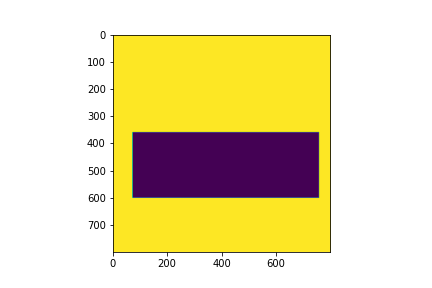

In [21]:
plot(mask)

In [32]:
#aktualierung der plot Funktion
def plot(img, cmap="gray"):
  fig,ax = plt.subplots()
  plt.imshow(img, cmap=cmap)


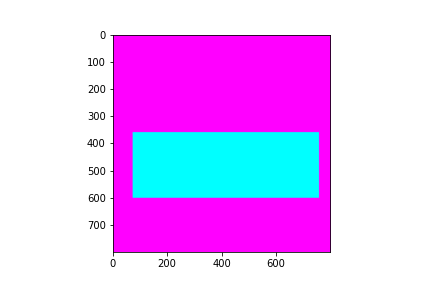

In [40]:
plot(mask, "cool")

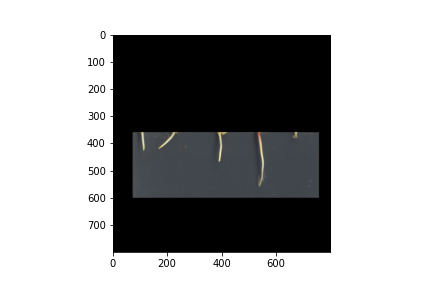

In [47]:
#setze die Maske auf unser Bild mit den Wurzeln uns alle anderen Werte auserhalb auf 0
image[mask]=[0,0,0]
plot(image)

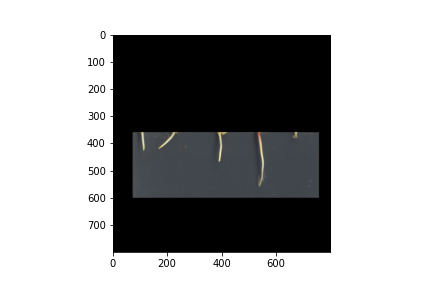

In [46]:
#setze die Maske auf unser Bild mit den Wurzeln
image[mask]=0
plot(image)

[Link zu einer Farbtabelle](https://www.farb-tabelle.de/de/farbtabelle.htm)

#### Practice Drawing

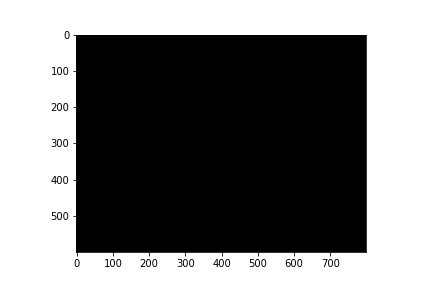

In [51]:
#erstelle schwarze Seite
image = np.zeros(shape=(600,800,3), dtype="uint8")

plot(image)


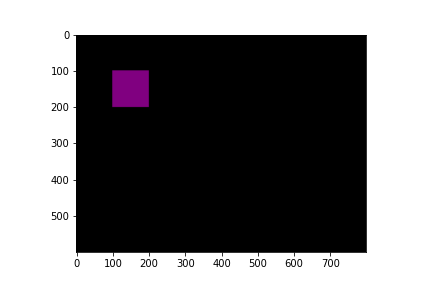

In [52]:
rr, cc = skimage.draw.rectangle(start=(100,100), end=(200,200))
image[rr,cc]=[128,0,128]

plot(image)

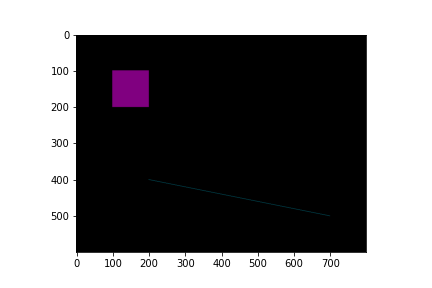

In [55]:
# Draw a green line from (400, 200) to (500, 700) in (ry, cx) coordinates
rr, cc = skimage.draw.line(r0=400, c0=200, r1=500, c1=700)
image[rr, cc] = (0, 120, 140)

plot(image)

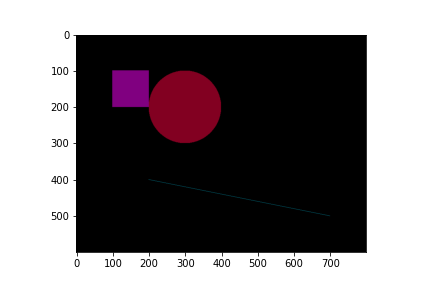

In [58]:
# Draw a blue circle with centre (200, 300) in (ry, cx) coordinates, and radius 100
rr, cc = skimage.draw.disk(center=(200, 300), radius=100, shape=image.shape[0:2])
image[rr, cc] = (130, 0, 33)

plot(image)

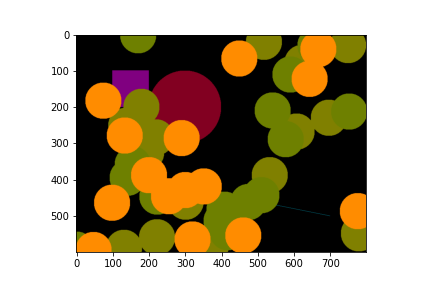

In [61]:
# create 15 random placed circles
import random


# draw a blue circle at a random location 15 times
for i in range(15):
    rr, cc = skimage.draw.disk(center=(
         random.randrange(600),
         random.randrange(800)),
         radius=50,
         shape=image.shape[0:2],
        )
    image[rr, cc] = (255, 140, 0)

plot(image)

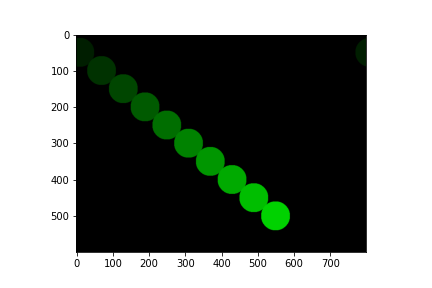

In [62]:
# neue leere Leinwand

image = np.zeros(shape=(600,800,3), dtype=("uint8"))
# mittels For-Schleife 10 Punkte, die sich in der Farbe und der Position verändern
for i in range(10):
  rr,cc = skimage.draw.disk(center=(50+50*i, 10+60*i), radius=40)
  image[rr,cc] = [0,30+20*i,0]

plot(image)

#### Anwendungsfall Drawing

In [ ]:
#Aufgabe: Versucht eine Maske zu erstellen, die nur die Wells freilässt

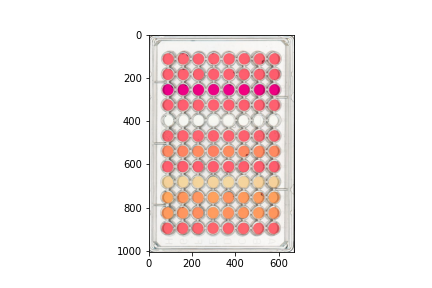

In [64]:
image = skimage.io.imread("/content/drive/MyDrive/data/wellplate-01.jpg")

plot(image)

In [65]:
# beispiel vorgehensweise für einzelne wells

mask = np.ones(shape=image.shape[0:2], dtype="bool")
rr,cc = skimage.draw.disk(center=(119,91), radius=20)
mask[rr,cc] = False

rr,cc = skimage.draw.disk(center=(542,368), radius=20)
mask[rr,cc] = False

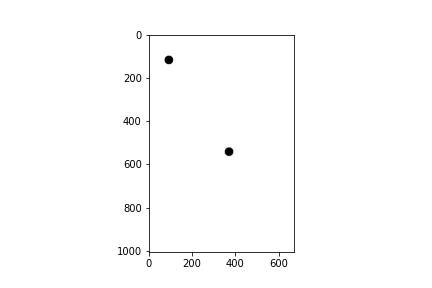

In [66]:
plot(mask)

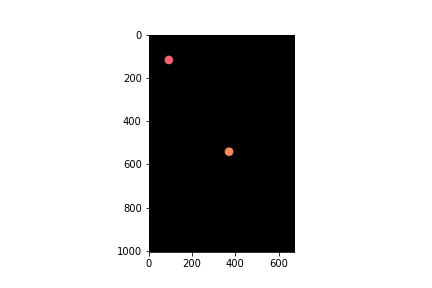

In [67]:
image[mask]=0
plot(image)

In [68]:
centers = np.loadtxt("/content/drive/MyDrive/data/centers.txt")

In [70]:
centers.shape

(96, 2)

In [73]:
#Aufgabe: ersetzt die print Funktion durch ein for loop, dass jedes Well
#ausgeschnitten wird

image = skimage.io.imread("/content/drive/MyDrive/data/wellplate-01.jpg")
mask = np.ones(shape=image.shape[0:2], dtype="bool")


for center in centers:
  print("Aktuelles Zentrum: x=", center[0], "y=", center[1])

image[mask] = 0 
plot(image)

Aktuelles Zentrum: x= 91.0 y= 108.0
Aktuelles Zentrum: x= 161.0 y= 108.0
Aktuelles Zentrum: x= 231.0 y= 108.0
Aktuelles Zentrum: x= 301.0 y= 108.0
Aktuelles Zentrum: x= 371.0 y= 108.0
Aktuelles Zentrum: x= 441.0 y= 108.0
Aktuelles Zentrum: x= 511.0 y= 108.0
Aktuelles Zentrum: x= 581.0 y= 108.0
Aktuelles Zentrum: x= 91.0 y= 180.0
Aktuelles Zentrum: x= 161.0 y= 180.0
Aktuelles Zentrum: x= 231.0 y= 180.0
Aktuelles Zentrum: x= 301.0 y= 180.0
Aktuelles Zentrum: x= 371.0 y= 180.0
Aktuelles Zentrum: x= 441.0 y= 180.0
Aktuelles Zentrum: x= 511.0 y= 180.0
Aktuelles Zentrum: x= 581.0 y= 180.0
Aktuelles Zentrum: x= 91.0 y= 252.0
Aktuelles Zentrum: x= 161.0 y= 252.0
Aktuelles Zentrum: x= 231.0 y= 252.0
Aktuelles Zentrum: x= 301.0 y= 252.0
Aktuelles Zentrum: x= 371.0 y= 252.0
Aktuelles Zentrum: x= 441.0 y= 252.0
Aktuelles Zentrum: x= 511.0 y= 252.0
Aktuelles Zentrum: x= 581.0 y= 252.0
Aktuelles Zentrum: x= 91.0 y= 324.0
Aktuelles Zentrum: x= 161.0 y= 324.0
Aktuelles Zentrum: x= 231.0 y= 324.0
Aktue